In [1]:
import os
from skimage.io import imread
from skimage.transform import resize
from keras.layers import Conv2D, MaxPool2D, Dropout, Flatten, Dense
from keras.models import Sequential

In [2]:
train_path='train'
categories=['NORMAL','PNEUMONIA']
X_train=[]
y_train=[]
for category in categories:
  fold_path=os.path.join(train_path,category)
  # print(fold_path)
  images=os.listdir(fold_path)
  # print(images)
  for img in images:
    img_path=os.path.join(fold_path,img)
    # print(img_path)
    img_array=imread(img_path)
    img=resize(img_array,(150,150,1))
    X_train.append(img)
    y_train.append(categories.index(category))
print('Loaded_category',category)

Loaded_category PNEUMONIA


In [3]:
test_path='test'
categories=categories=['NORMAL','PNEUMONIA']
X_test=[]
y_test=[]
for category in categories:
  fold_path=os.path.join(test_path,category)
  # print(fold_path)
  images=os.listdir(fold_path)
  # print(images)
  for img in images:
    img_path=os.path.join(fold_path,img)
    # print(img_path)
    img_array=imread(img_path)
    img=resize(img_array,(150,150,1))
    X_test.append(img)
    y_test.append(categories.index(category))
print('Loaded_category',category)

Loaded_category PNEUMONIA


In [4]:
import numpy as np
X_train=np.array(X_train)
X_test=np.array(X_test)
y_train=np.array(y_train)
y_test=np.array(y_test)

In [5]:
X_train.shape,y_train.shape

((5216, 150, 150, 1), (5216,))

In [6]:
X_test.shape,y_test.shape

((624, 150, 150, 1), (624,))

In [7]:

model = Sequential()

# First convolutional block
model.add(Conv2D(filters=64, kernel_size=(3, 3), padding='same', activation='relu'))
model.add(MaxPool2D(pool_size=2, strides=2))

# Second convolutional block
model.add(Conv2D(filters=128, kernel_size=(3, 3), padding='same', activation='relu'))
model.add(MaxPool2D(pool_size=2, strides=2))
model.add(Dropout(0.25))  ## drop 25% neurons (stop)

# Third convolutional block
model.add(Conv2D(filters=128, kernel_size=(3, 3), padding='same', activation='relu'))
model.add(MaxPool2D(pool_size=2, strides=2))
model.add(Dropout(0.25))

# Fourth convolutional block
model.add(Conv2D(filters=256, kernel_size=(3, 3), padding='same', activation='relu'))
model.add(MaxPool2D(pool_size=2, strides=2))

# Flatten and Dense layers
model.add(Flatten())
model.add(Dense(units=128, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(units=64, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(units=32, activation='relu'))

# Output layer
model.add(Dense(2, activation='softmax'))



In [8]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [9]:
model.fit(X_train,y_train,epochs=100,batch_size=6)

Epoch 1/100
870/870 ━━━━━━━━━━━━━━━━━━━━ 227s 257ms/step - accuracy: 0.7309 - loss: 0.5626
Epoch 2/100
870/870 ━━━━━━━━━━━━━━━━━━━━ 258s 297ms/step - accuracy: 0.9190 - loss: 0.2130
Epoch 3/100
870/870 ━━━━━━━━━━━━━━━━━━━━ 253s 291ms/step - accuracy: 0.9431 - loss: 0.1584
Epoch 4/100
870/870 ━━━━━━━━━━━━━━━━━━━━ 278s 319ms/step - accuracy: 0.9490 - loss: 0.1409
Epoch 5/100
870/870 ━━━━━━━━━━━━━━━━━━━━ 311s 357ms/step - accuracy: 0.9603 - loss: 0.1127
Epoch 6/100
870/870 ━━━━━━━━━━━━━━━━━━━━ 321s 369ms/step - accuracy: 0.9617 - loss: 0.1033
Epoch 7/100
870/870 ━━━━━━━━━━━━━━━━━━━━ 317s 364ms/step - accuracy: 0.9625 - loss: 0.1002
Epoch 8/100
870/870 ━━━━━━━━━━━━━━━━━━━━ 263s 302ms/step - accuracy: 0.9651 - loss: 0.1023
Epoch 9/100
870/870 ━━━━━━━━━━━━━━━━━━━━ 261s 300ms/step - accuracy: 0.9703 - loss: 0.0857
Epoch 10/100
870/870 ━━━━━━━━━━━━━━━━━━━━ 262s 301ms/step - accuracy: 0.9704 - loss: 0.0864
Epoch 11/100
870/870 ━━━━━━━━━━━━━━━━━━━━ 1663s 2s/step - accuracy: 0.9768 - loss: 0.0592

In [11]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 150, 150, 64)   │           640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 75, 75, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 75, 75, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 37, 37, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 37, 37, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 37, 37, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 18, 18, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 18, 18, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 18, 18, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 9, 9, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 20736)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     2,654,336 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 2)              │            66 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 9,545,960 (36.41 MB)

 Trainable params: 3,181,986 (12.14 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 6,363,974 (24.28 MB)

In [12]:
model.evaluate(X_test,y_test)

20/20 ━━━━━━━━━━━━━━━━━━━━ 4s 176ms/step - accuracy: 0.5291 - loss: 10.2016


[5.44669771194458, 0.7339743375778198]

In [13]:
y_pred=model.predict(X_test)
y_pred

20/20 ━━━━━━━━━━━━━━━━━━━━ 4s 181ms/step


array([[1.9306953e-04, 9.9980694e-01],
       [1.0632102e-05, 9.9998939e-01],
       [4.4357964e-01, 5.5642039e-01],
       ...,
       [0.0000000e+00, 1.0000000e+00],
       [3.0316385e-17, 1.0000000e+00],
       [5.6207673e-06, 9.9999440e-01]], dtype=float32)

In [14]:
y_pred1=y_pred.argmax(axis=1)
y_pred1

array([1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1,
       1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0,
       0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1,
       1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [15]:
y_test

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

              precision    recall  f1-score   support

           0       0.96      0.30      0.46       234
           1       0.70      0.99      0.82       390

    accuracy                           0.73       624
   macro avg       0.83      0.65      0.64       624
weighted avg       0.80      0.73      0.69       624



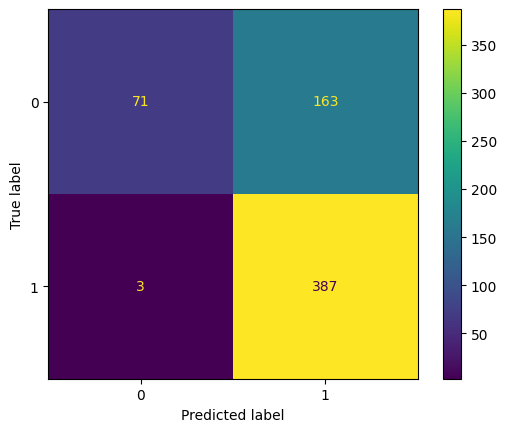

In [16]:
from sklearn.metrics import classification_report
from sklearn.metrics import ConfusionMatrixDisplay
print(classification_report(y_test,y_pred1))
print(ConfusionMatrixDisplay.from_predictions(y_test,y_pred1))

In [17]:
def predict_new(new_image,model):
  resized_image=resize(new_image,(150,150,1))
  img=resized_image.reshape(1,150,150,1)
  pred=model.predict(img)
  ind=pred.argmax()
  categories=categories=['NORMAL','PNEUMONIA']
  print(categories[ind])

In [18]:
imgpath=input("Enter the image path")
img=imread(imgpath)
predict_new(img,model)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step
PNEUMONIA


In [19]:
# Save the model in native Keras format
model.save("pneumonia_detection_model.keras")
